# Platform information

In [1]:
library(benchmarkme)
get_platform_info()$OS.type
get_r_version()$version.string
get_cpu()$model_name;get_cpu()$no_of_cores
get_ram()

[1] "windows"

[1] "R version 3.5.1 (2018-07-02)"

[1] "Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz"

[1] 8

8.59 GB

# Sort

In [2]:
#sort
geno <-read.table("Hetero_realigned_cov10_filtered3.raw", row.names=1, header=T)
colnames(geno)<-1:3928
rownames(geno)<-1:240
lin_map<-read.table("raw.map")
lin_map["id"]=1:3928
m<-lin_map[order(lin_map$V2),]
sortM<-m[order(m$V1),]
sortgeno<-geno[,sortM$id]
colnames(sortgeno)<-1:3928

# Genetic effect

In [3]:
library("BGLR")
packageVersion("BGLR")

[1] '1.0.5'

In [4]:
x <- as.matrix(sortgeno)-1 
pheno <- read.csv("2017heteroPheno.csv", header=T)
attach(pheno)

In [5]:
fmBB=BGLR(y=sqrt(bcw+1),ETA=list(list(X=x,model='BayesB')),nIter=2000,burnIn=1000,saveAt='BB_')


#--------------------------------------------------------------------#
#        _\\|//_                                                     #
#       (` o-o ')      BGLR v1.0.5                                   #
#------ooO-(_)-Ooo---------------------------------------------------#
#                      Bayesian Generalized Linear Regression        #
#                      Gustavo de los Campos, gdeloscampos@gmail.com #
#    .oooO     Oooo.   Paulino Perez-Rodriguez, perpdgo@gmail.com    #
#    (   )     (   )   Agust, 2016                                   #
#_____\ (_______) /_________________________________________________ #
#      \_)     (_/                                                   #
#                                                                    #
#------------------------------------------------------------------- #

  R2 in LP 1 was missing and was set to 0.5
  DF in LP 1 was missing and was set to 5
  probIn in LP 1 was missing and was set to 0.5
  Counts in 

In [34]:
m<-list()
panel<-seq(50,3928,50)
for (i in 1:length(panel)){
m[i]<-sum(sample(SD.bHat,panel[i]))/sum(SD.bHat)
    }

In [25]:
plot(m.

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


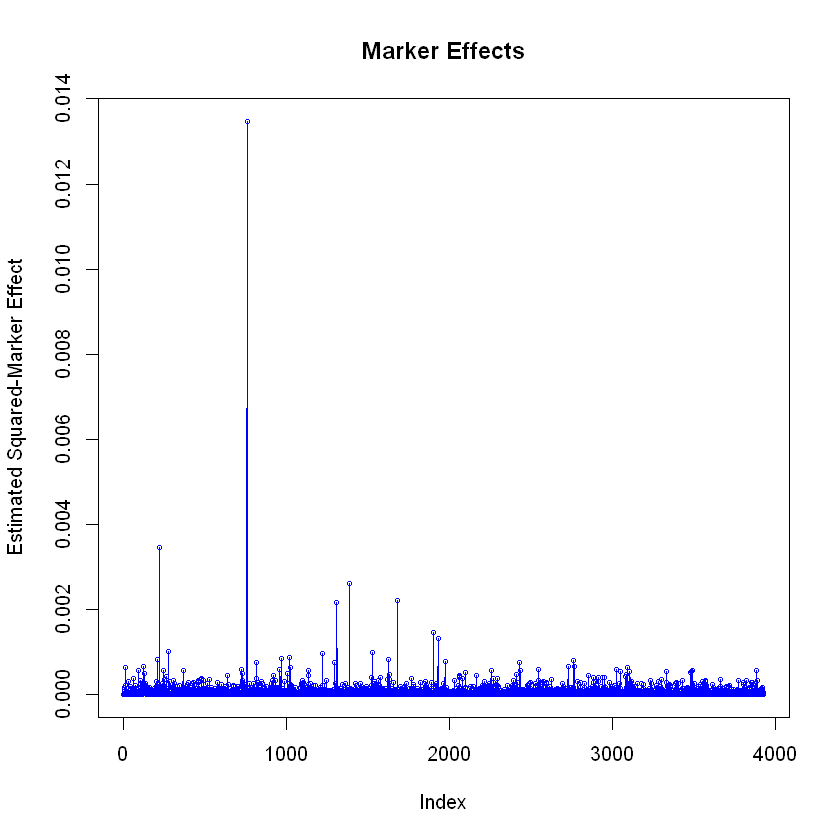

In [6]:
bHat<- fmBB$ETA[[1]]$b
SD.bHat<- fmBB$ETA[[1]]$SD.b 
plot(bHat^2, ylab='Estimated Squared-Marker Effect', type='o',cex=.5,col=4,main='Marker Effects')

In [9]:
for (i in seq(0.01,0.1,0.01))
     print(paste(i^2,sum(bHat^2>i^2)))

[1] "1e-04 703"
[1] "4e-04 85"
[1] "9e-04 20"
[1] "0.0016 9"
[1] "0.0025 6"
[1] "0.0036 4"
[1] "0.0049 3"
[1] "0.0064 2"
[1] "0.0081 1"
[1] "0.01 1"


In [10]:
fmBC=BGLR(y=sqrt(bcw+1),ETA=list(list(X=x,model='BayesC')),nIter=2000,burnIn=1000,saveAt='BC_')


#--------------------------------------------------------------------#
#        _\\|//_                                                     #
#       (` o-o ')      BGLR v1.0.5                                   #
#------ooO-(_)-Ooo---------------------------------------------------#
#                      Bayesian Generalized Linear Regression        #
#                      Gustavo de los Campos, gdeloscampos@gmail.com #
#    .oooO     Oooo.   Paulino Perez-Rodriguez, perpdgo@gmail.com    #
#    (   )     (   )   Agust, 2016                                   #
#_____\ (_______) /_________________________________________________ #
#      \_)     (_/                                                   #
#                                                                    #
#------------------------------------------------------------------- #

  R2 in LP 1 was missing and was set to 0.5
  DF in LP 1 was missing and was set to 5
  probIn in LP 1 was missing and was set to 0.5
  Counts in 

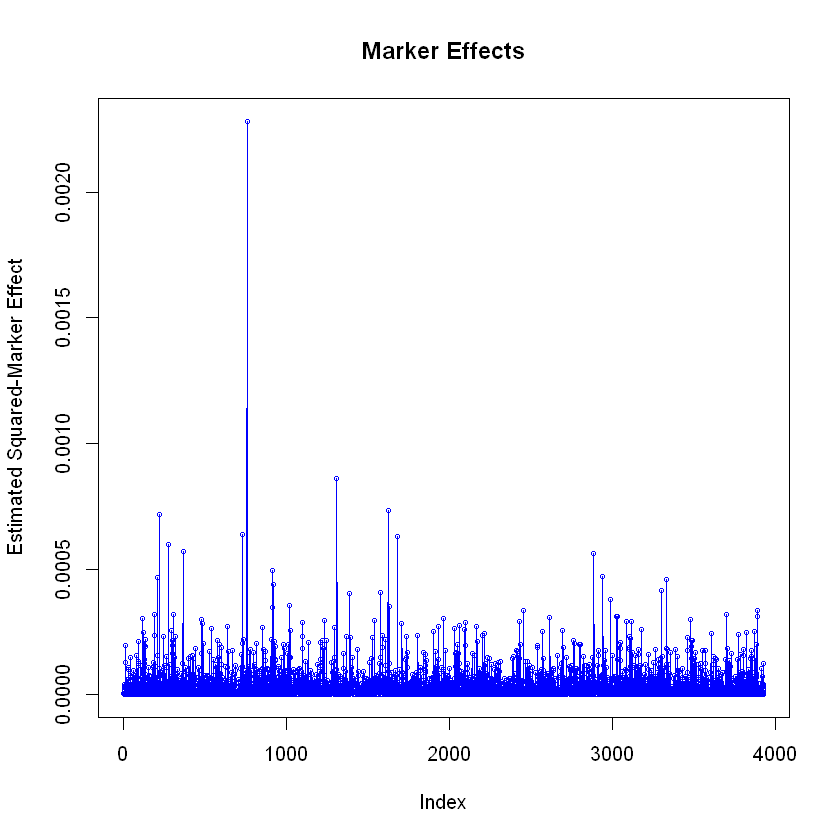

In [11]:
bHat<- fmBC$ETA[[1]]$b
SD.bHat<- fmBC$ETA[[1]]$SD.b 
plot(bHat^2, ylab='Estimated Squared-Marker Effect', type='o',cex=.5,col=4,main='Marker Effects')

In [12]:
for (i in seq(0.01,0.1,0.01))
     print(paste(i^2,sum(bHat^2>i^2)))

[1] "1e-04 361"
[1] "4e-04 17"
[1] "9e-04 1"
[1] "0.0016 1"
[1] "0.0025 0"
[1] "0.0036 0"
[1] "0.0049 0"
[1] "0.0064 0"
[1] "0.0081 0"
[1] "0.01 0"


In [14]:
source("http://www.zzlab.net/sandbox/BAGS.R")
ki<-BAGS(x, y=sqrt(bcw+1),pi=1,burn.in=1000,burn.out=2000)

Welcome using BAGS (Bayesian Alphabet for Genomic Selection)
Gibbs sampling (MCMC)...
iteration  10  number of loci in model =  11 
iteration  20  number of loci in model =  15 
iteration  30  number of loci in model =  15 
iteration  40  number of loci in model =  47 
iteration  50  number of loci in model =  43 
iteration  60  number of loci in model =  73 
iteration  70  number of loci in model =  58 
iteration  80  number of loci in model =  98 
iteration  90  number of loci in model =  75 
iteration  100  number of loci in model =  106 
iteration  110  number of loci in model =  121 
iteration  120  number of loci in model =  144 
iteration  130  number of loci in model =  204 
iteration  140  number of loci in model =  224 
iteration  150  number of loci in model =  200 
iteration  160  number of loci in model =  190 
iteration  170  number of loci in model =  143 
iteration  180  number of loci in model =  174 
iteration  190  number of loci in model =  194 
iteration  200  numb

In [17]:
ki$pi

[1] 0.6254044

In [18]:
pred<-as.matrix(x) %*% ki$effect
cor(pheno$bcw,pred)

0.8829836


In [1]:
bHat<-ki$effect
plot(bHat^2, ylab='Estimated Squared-Marker Effect', type='o',cex=.5,col=4,main='Marker Effects by BayesCpi')

ERROR: Error in eval(expr, envir, enclos): object 'ki' not found


In [16]:
for (i in seq(0.01,0.1,0.01))
     print(paste(i^2,sum(bHat^2>i^2)))

[1] "1e-04 37"
[1] "4e-04 5"
[1] "9e-04 4"
[1] "0.0016 2"
[1] "0.0025 1"
[1] "0.0036 1"
[1] "0.0049 1"
[1] "0.0064 1"
[1] "0.0081 1"
[1] "0.01 0"
